In [1]:
import pandas as pd

# Load dataset from the local drive
file_path = r'C:\Users\Banele\Downloads\advertising.csv'
df = pd.read_csv(file_path)

# Check the first 4 rows of the dataset
df.head(4)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5


In [7]:
# Display basic statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [11]:
# Display data types
print(df.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


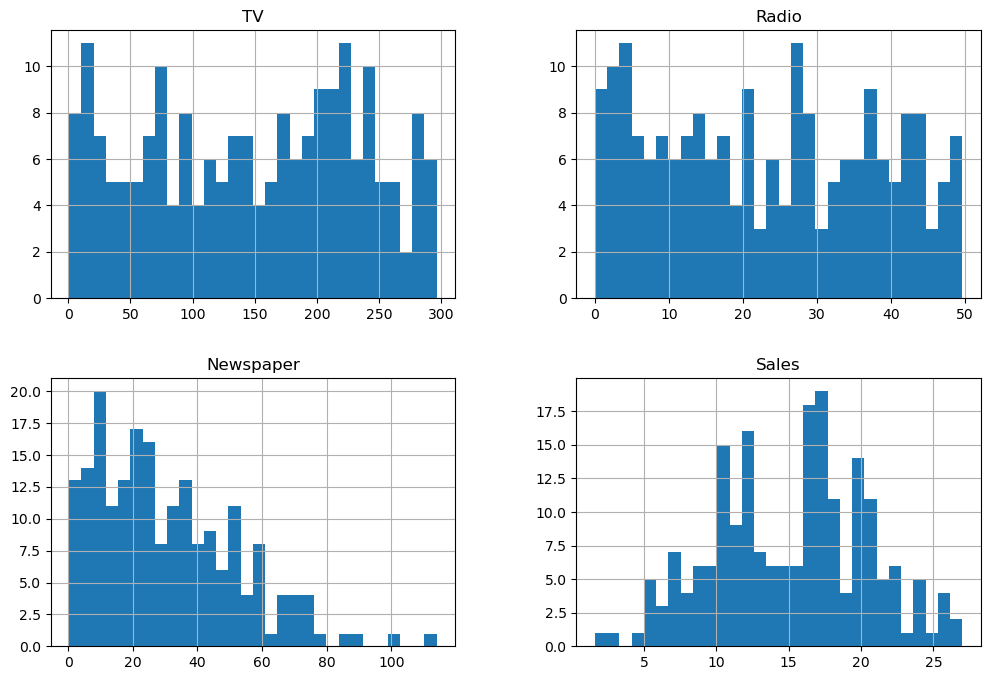

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(bins=30, figsize=(12, 8))
plt.show()

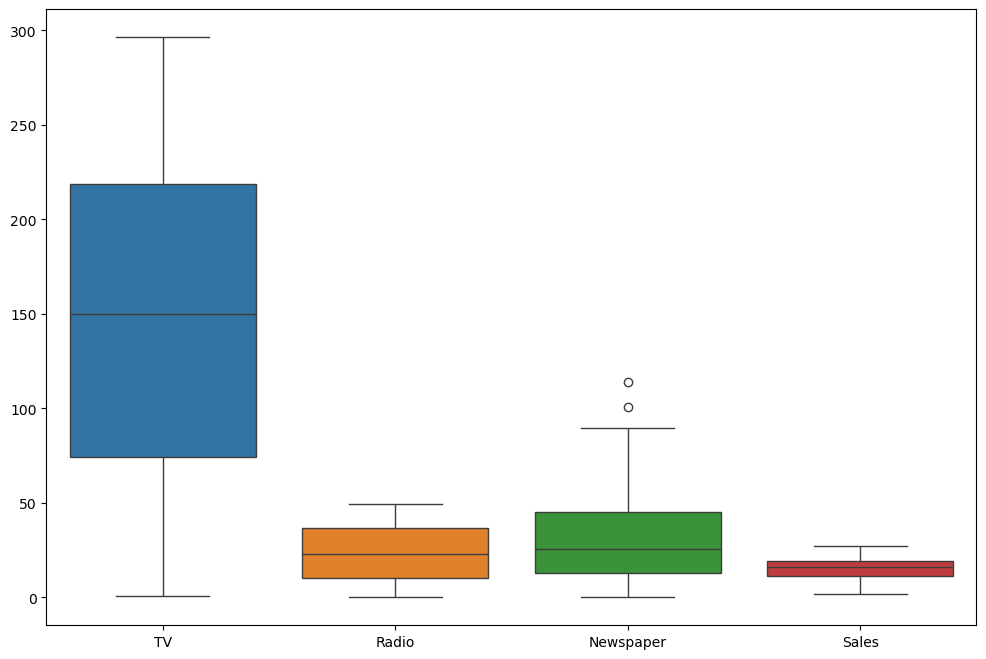

In [15]:
# Plot box plots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

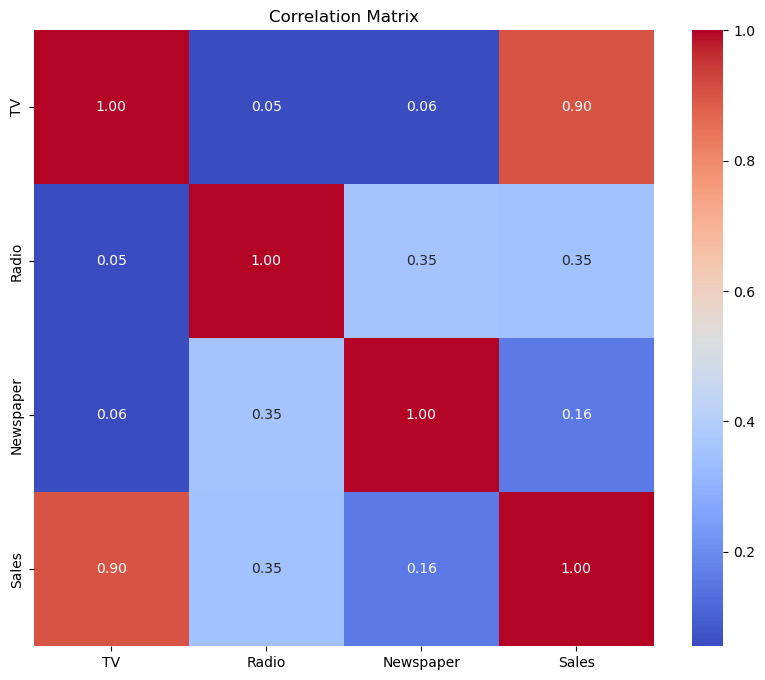

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

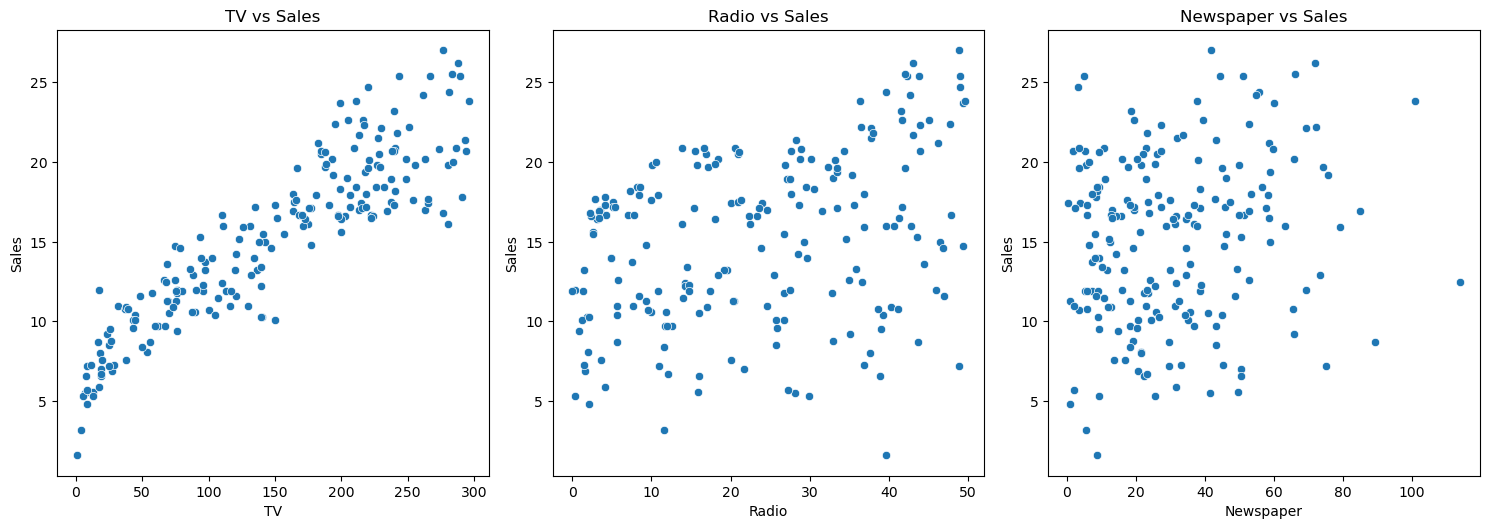

In [19]:
# Scatter plots for each feature vs Sales
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['Sales'])
    plt.title(f'{feature} vs Sales')

plt.tight_layout()
plt.show()

In [27]:
# Check feature ranges
df[['TV', 'Radio', 'Newspaper']].describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
df_scaled = df.copy()
df_scaled[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])

df_scaled.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.266086,15.130500
std,0.290342,0.299331,0.191545,5.283892
min,0.000000,0.000000,0.000000,1.600000
25%,0.249155,0.201109,0.109499,11.000000
50%,0.504058,0.461694,0.223835,16.000000
75%,0.737656,0.736391,0.394019,19.050000
max,1.000000,1.000000,1.000000,27.000000


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
df_standardized = df.copy()
df_standardized[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])
df_standardized.describe()

,TV,Radio,Newspaper,Sales
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,1.221245e-16,-4.529710e-16,2.220446e-16,15.130500
std,1.002509e+00,1.002509e+00,1.002509e+00,5.283892
min,-1.708823e+00,-1.570868e+00,-1.392646e+00,1.600000
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01,11.000000
50%,3.161515e-02,-2.457858e-02,-2.211368e-01,16.000000
75%,8.381955e-01,8.954299e-01,6.695788e-01,19.050000
max,1.744029e+00,1.778300e+00,3.841171e+00,27.000000


In [31]:
# Check skewness of features
df[['TV', 'Radio', 'Newspaper']].skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
dtype: float64

In [35]:
import numpy as np
# Apply logarithmic transformation to skewed features
df_transformed = df.copy()

# Example: Transforming 'Newspaper' if skewed
df_transformed['Newspaper'] = np.log1p(df['Newspaper'])
df_transformed[['TV', 'Radio', 'Newspaper']].skew()

TV          -0.069853
Radio        0.094175
Newspaper   -0.799875
dtype: float64

In [37]:
# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training (70%) and testing (30%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
model_results = {}
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_results[name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }
    
    # Print the model's performance
    print(f'{name} - MSE: {mse}, R-squared: {r2}')


Linear Regression - MSE: 2.541624036229147, R-squared: 0.9091484341849799
Decision Tree - MSE: 3.221333333333333, R-squared: 0.8848519005274841
Random Forest - MSE: 1.5765826333333335, R-squared: 0.9436443003239732
Gradient Boosting - MSE: 1.8044526031179715, R-squared: 0.9354989793551526


In [41]:
# Convert the results into a DataFrame for easier comparison
results_df = pd.DataFrame(model_results).T
results_df

,Mean Squared Error,R-squared
Linear Regression,2.541624,0.909148
Decision Tree,3.221333,0.884852
Random Forest,1.576583,0.943644
Gradient Boosting,1.804453,0.935499


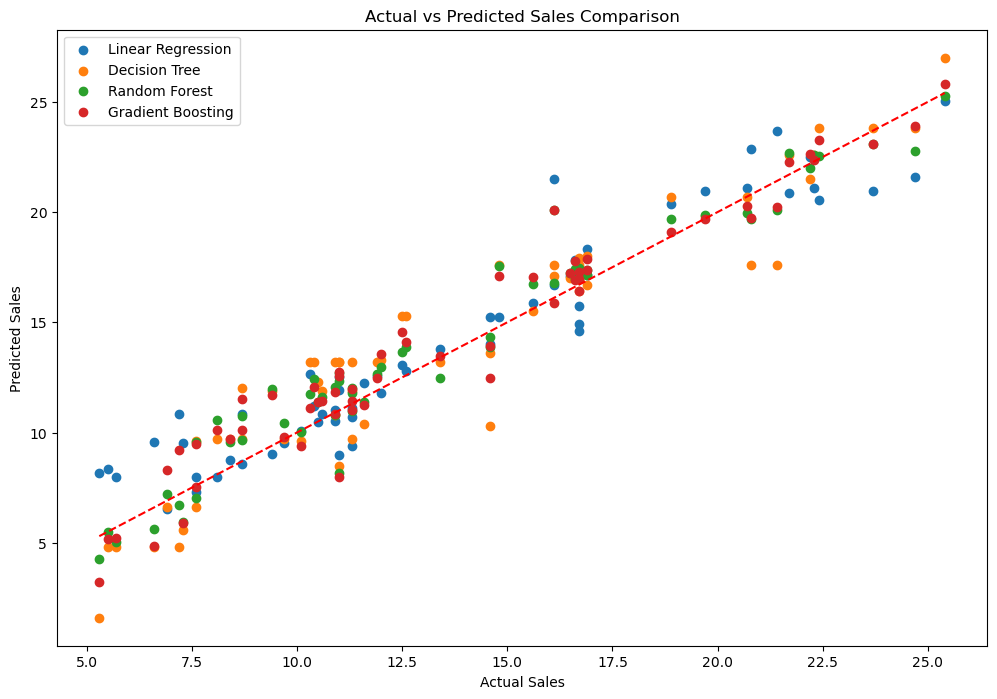

In [43]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted values for each model
plt.figure(figsize=(12, 8))

for name, model in models.items():
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Create scatter plot
    plt.scatter(y_test, y_pred, label=name)

# Plot details
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales Comparison')
plt.legend()
plt.show()

In [45]:
# Identify the best model
best_model_name = results_df['R-squared'].idxmax()
best_model = models[best_model_name]

print(f'The best model is {best_model_name}')


The best model is Random Forest


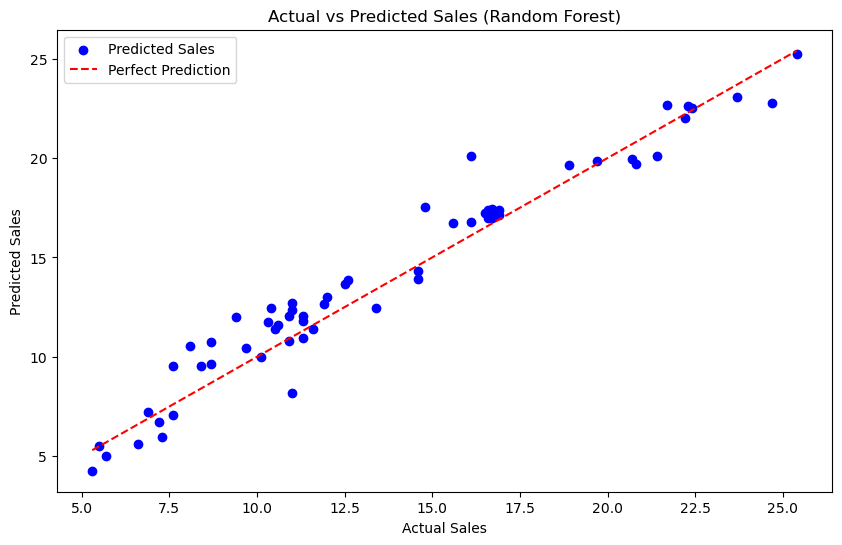

In [47]:
import matplotlib.pyplot as plt

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', label='Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales ({best_model_name})')
plt.legend()
plt.show()

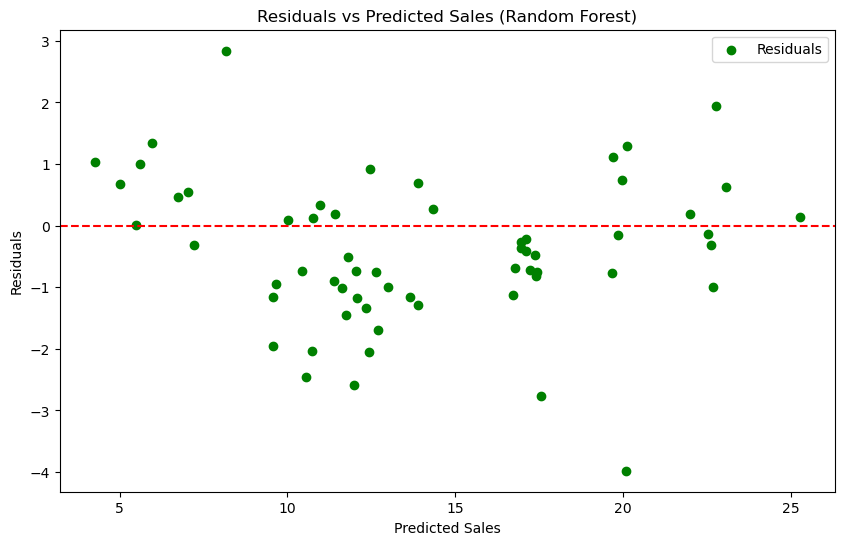

In [49]:
# Plot residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title(f'Residuals vs Predicted Sales ({best_model_name})')
plt.legend()
plt.show()